<a href="https://colab.research.google.com/github/azahrasalsaa/PCVK_Ganjil_2024/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***TUGAS PRAKTIKUM***

**1. Buat Gamma Correction sesuai dengan petunjuk berikut**

In [1]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 4


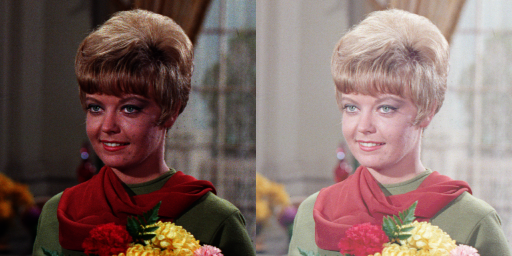

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

def gamma_correction(image, gamma):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv.LUT(image, table)

print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Assets/female.tiff')
corrected_image = gamma_correction(original, gamma)

final_frame = cv.hconcat((original, corrected_image))
cv2_imshow(final_frame)

**2. Buat Simulasi Image Depth**

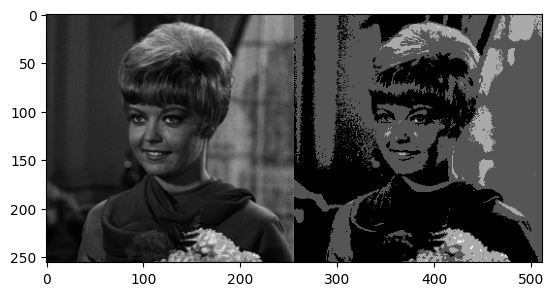

In [3]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/PCVK/Assets/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    depth_image[y, x] = np.clip(round(original[y, x] / level) * level, 0, 255);

final_frame = cv.hconcat((original, depth_image))
plt.imshow(final_frame, cmap='gray')
plt.axis('on')
plt.show()

**3. Buat Modul Average Denoising**

Nilai PSNR dengan 5 citra: 27.53 dB


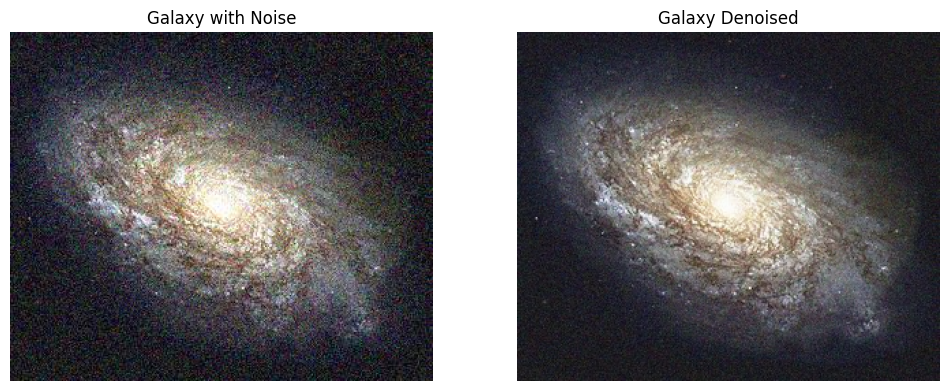

In [6]:
import glob
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np
from math import sqrt, log10

def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100  # PSNR maksimal jika tidak ada perbedaan
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

# Membaca citra asli
original_img = cv.imread('/content/drive/MyDrive/PCVK/Assets/galaxy.jpg')

# Membaca semua citra noise dalam folder
cv_img = [cv.imread(img) for img in glob.glob('/content/drive/MyDrive/PCVK/Assets/noises/*.jpg')]

# Pastikan ada citra yang terbaca
if len(cv_img) == 0:
    raise ValueError("Tidak ada gambar yang ditemukan dalam folder.")

# Jumlah gambar yang akan digunakan
jmlGambar = min(5, len(cv_img))  # Mengambil maksimum 5 gambar atau kurang jika tidak cukup

# Inisialisasi gambar denoised
denoised_img = np.zeros_like(cv_img[0], dtype=np.float32)

# Akumulasi gambar
for i in range(jmlGambar):
    denoised_img += cv_img[i].astype(np.float32)

# Rata-rata dan konversi kembali ke uint8
denoised_img = np.clip(denoised_img / jmlGambar, 0, 255).astype(np.uint8)

# Hitung PSNR antara citra asli dan hasil denoising
psnr = PSNR(original_img, denoised_img)

print(f'Nilai PSNR dengan {jmlGambar} citra: {psnr:.2f} dB')

# Tampilkan hasil menggunakan matplotlib
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(cv_img[0], cv.COLOR_BGR2RGB))
plt.title('Galaxy with Noise')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(denoised_img, cv.COLOR_BGR2RGB))
plt.title('Galaxy Denoised')
plt.axis('off')

plt.show()


Nilai PSNR dengan 10 citra: 27.54 dB


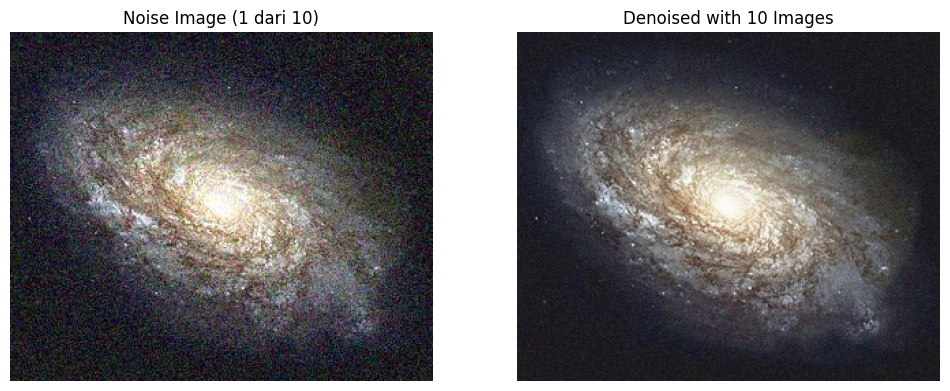

Nilai PSNR dengan 20 citra: 27.52 dB


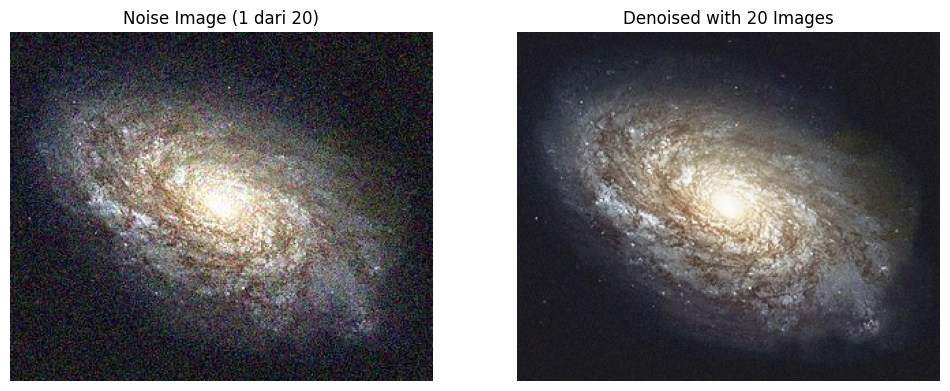

Nilai PSNR dengan 40 citra: 27.45 dB


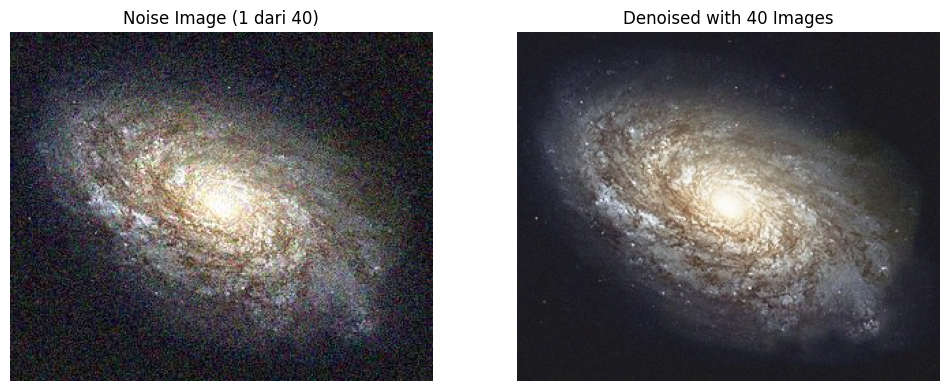

Nilai PSNR dengan 80 citra: 27.41 dB


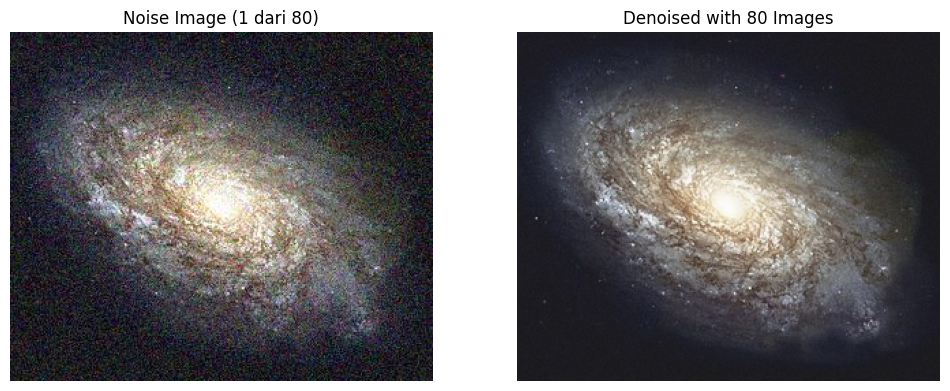

Nilai PSNR dengan 100 citra: 27.37 dB


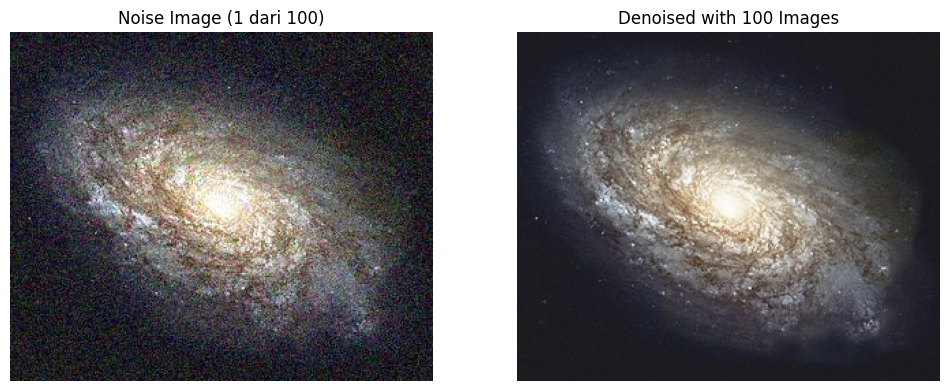

In [38]:
import glob
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt, log10

def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100  # PSNR maksimal jika tidak ada perbedaan
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

# Membaca citra asli
original_img = cv.imread('/content/drive/MyDrive/PCVK/Assets/galaxy.jpg')

# Membaca semua citra noise dalam folder
cv_img = [cv.imread(img) for img in glob.glob('/content/drive/MyDrive/PCVK/Assets/noises/*.jpg')]
# Pastikan ada citra yang terbaca
if len(cv_img) == 0:
    raise ValueError("Tidak ada gambar yang ditemukan dalam folder.")

# Jumlah gambar yang akan diuji
jumlah_gambar_list = [10, 20, 40, 80, 100]

# Looping untuk setiap jumlah gambar
for jmlGambar in jumlah_gambar_list:
    # Pastikan tidak melebihi jumlah gambar yang tersedia
    jmlGambar = min(jmlGambar, len(cv_img))

    # Inisialisasi gambar denoised
    denoised_img = np.zeros_like(cv_img[0], dtype=np.float32)

    # Akumulasi gambar
    for i in range(jmlGambar):
        denoised_img += cv_img[i].astype(np.float32)

    # Rata-rata dan konversi kembali ke uint8
    denoised_img = np.clip(denoised_img / jmlGambar, 0, 255).astype(np.uint8)

    # Hitung PSNR antara citra asli dan hasil denoising
    psnr = PSNR(original_img, denoised_img)

    # Tampilkan hasil dan nilai PSNR
    print(f'Nilai PSNR dengan {jmlGambar} citra: {psnr:.2f} dB')

    # Plot gambar asli dan denoised
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv.cvtColor(cv_img[0], cv.COLOR_BGR2RGB))
    plt.title(f'Noise Image (1 dari {jmlGambar})')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv.cvtColor(denoised_img, cv.COLOR_BGR2RGB))
    plt.title(f'Denoised with {jmlGambar} Images')
    plt.axis('off')

    plt.show()


**4. Buat image masking untuk image berikut. Image kiri adalah image asli, sedangkan image paling kanan aadalah hasilnya**

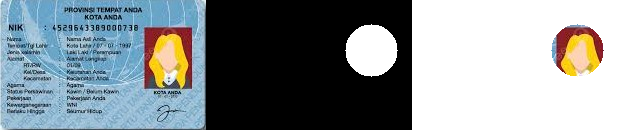

In [31]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# Membaca gambar KTP
img = cv.imread('/content/drive/MyDrive/PCVK/image/ktp.jpeg')

# Membuat mask berukuran sama dengan gambar
mask = np.zeros(img.shape, dtype=np.uint8)

# Menentukan posisi dan ukuran lingkaran mask (sesuaikan koordinat dan radius)
# Di sini saya asumsikan wajah ada di sekitar (x=100, y=80) dan radius = 50 (Anda bisa modifikasi)
mask = cv.circle(mask, (165, 50), 26, (255, 255, 255), -1)

# Menggabungkan mask dengan gambar menggunakan operator AND
result = cv.bitwise_and(img, mask)

# Mengubah piksel yang tidak terkena mask menjadi putih
result[mask == 0] = 255

# Menggabungkan gambar asli, mask, dan hasil masking dalam satu frame
final_frame = cv.hconcat([img, mask, result])

# Menampilkan hasil
cv2_imshow(final_frame)


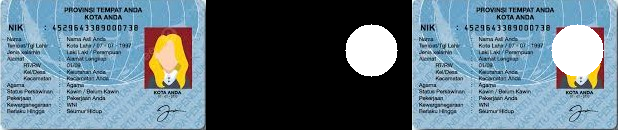

In [32]:
#operator or
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# Membaca gambar KTP
img = cv.imread('/content/drive/MyDrive/PCVK/image/ktp.jpeg')

# Membuat mask berukuran sama dengan gambar
mask = np.zeros(img.shape, dtype=np.uint8)

# Menentukan posisi dan ukuran lingkaran mask (sesuaikan koordinat dan radius)
mask = cv.circle(mask, (165, 50), 26, (255, 255, 255), -1)

# Menerapkan operator OR antara gambar dan mask
result_or = cv.bitwise_or(img, mask)

# Menggabungkan gambar asli, mask, dan hasil masking menggunakan OR dalam satu frame
final_frame = cv.hconcat([img, mask, result_or])

# Menampilkan hasil
cv2_imshow(final_frame)


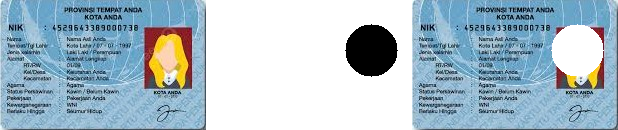

In [33]:
#operator not
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# Membaca gambar KTP
img = cv.imread('/content/drive/MyDrive/PCVK/image/ktp.jpeg')

# Membuat mask berukuran sama dengan gambar
mask = np.zeros(img.shape, dtype=np.uint8)

# Menentukan posisi dan ukuran lingkaran mask (sesuaikan koordinat dan radius)
mask = cv.circle(mask, (165, 50), 26, (255, 255, 255), -1)

# Menerapkan operator NOT pada mask
mask_not = cv.bitwise_not(mask)

# Menggabungkan mask dengan gambar menggunakan operator AND
result = cv.bitwise_and(img, mask_not)

# Mengubah piksel yang tidak terkena mask menjadi putih
result[mask_not == 0] = 255

# Menggabungkan gambar asli, mask NOT, dan hasil masking dalam satu frame
final_frame = cv.hconcat([img, mask_not, result])

# Menampilkan hasil
cv2_imshow(final_frame)


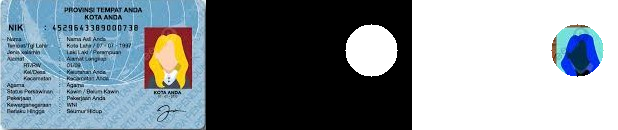

In [34]:
#operator and
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# Membaca gambar KTP
img = cv.imread('/content/drive/MyDrive/PCVK/image/ktp.jpeg')

# Membuat mask berukuran sama dengan gambar
mask = np.zeros(img.shape, dtype=np.uint8)

# Menentukan posisi dan ukuran lingkaran mask (sesuaikan koordinat dan radius)
mask = cv.circle(mask, (165, 50), 26, (255, 255, 255), -1)

# Menerapkan operator AND antara gambar dan mask
result_and = cv.bitwise_and(img, mask)

# Menerapkan operator NOT pada hasil AND (NAND = NOT(AND))
result_nand = cv.bitwise_not(result_and)

# Menggabungkan gambar asli, mask, dan hasil masking menggunakan NAND dalam satu frame
final_frame = cv.hconcat([img, mask, result_nand])

# Menampilkan hasil
cv2_imshow(final_frame)


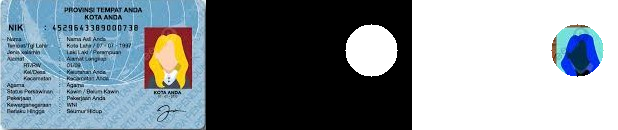

In [35]:
#operator nand
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# Membaca gambar KTP
img = cv.imread('/content/drive/MyDrive/PCVK/image/ktp.jpeg')

# Membuat mask berukuran sama dengan gambar
mask = np.zeros(img.shape, dtype=np.uint8)

# Menentukan posisi dan ukuran lingkaran mask (sesuaikan koordinat dan radius)
mask = cv.circle(mask, (165, 50), 26, (255, 255, 255), -1)

# Menerapkan operator AND antara gambar dan mask
result_and = cv.bitwise_and(img, mask)

# Menerapkan operator NOT pada hasil AND (NAND = NOT(AND))
result_nand = cv.bitwise_not(result_and)

# Menggabungkan gambar asli, mask, dan hasil masking menggunakan NAND dalam satu frame
final_frame = cv.hconcat([img, mask, result_nand])

# Menampilkan hasil
cv2_imshow(final_frame)


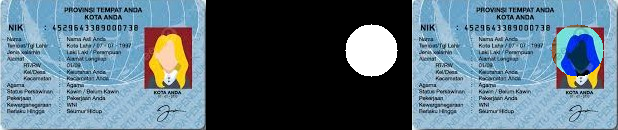

In [36]:
#operator xor
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# Membaca gambar KTP
img = cv.imread('/content/drive/MyDrive/PCVK/image/ktp.jpeg')

# Membuat mask berukuran sama dengan gambar
mask = np.zeros(img.shape, dtype=np.uint8)

# Menentukan posisi dan ukuran lingkaran mask (sesuaikan koordinat dan radius)
mask = cv.circle(mask, (165, 50), 26, (255, 255, 255), -1)

# Menerapkan operator XOR antara gambar dan mask
result_xor = cv.bitwise_xor(img, mask)

# Menggabungkan gambar asli, mask, dan hasil masking menggunakan XOR dalam satu frame
final_frame = cv.hconcat([img, mask, result_xor])

# Menampilkan hasil
cv2_imshow(final_frame)
